In [1]:
H0km = 67.6
ΩΛ = 0.69
Ωm = 0.31


In [2]:
import cosmolopy.magnitudes as cm
import cosmolopy.distance as cd

cosmo = {'omega_M_0' : 0.31, 'omega_lambda_0' : 0.69, 
         'h' : 0.676, 'omega_k_0': 0}

data2 = []

z = 0.1
pc2ly = 3.261564
while z < 15:
    dL = cd.luminosity_distance(z, **cosmo)  # * pc2ly
    dm = cm.distance_modulus(z, **cosmo)
    
    data2.append([z, dL, dm])
    
    z += 0.1

In [3]:
import math
data = []

z = 0.1
pc2ly = 3.261564
while z < 15:
    dL = 299792/70 * (1+z) * math.log(1+z) #  * pc2ly
    dm = 5 * math.log10(dL) + 25
    
    data.append([z, dL, dm])
    
    z += 0.1

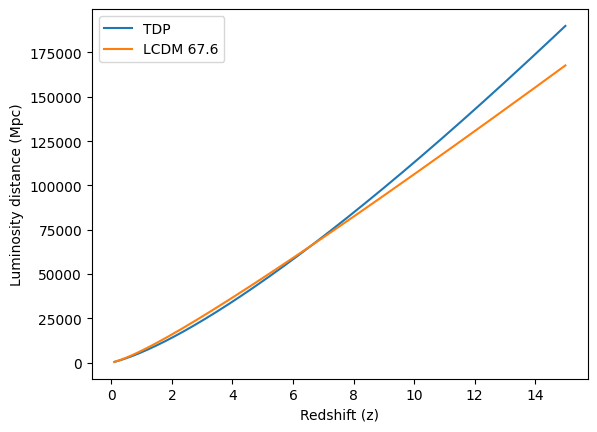

In [4]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[1] for row in data] 
datad2 = [row[1] for row in data2] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = "LCDM 67.6")

plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

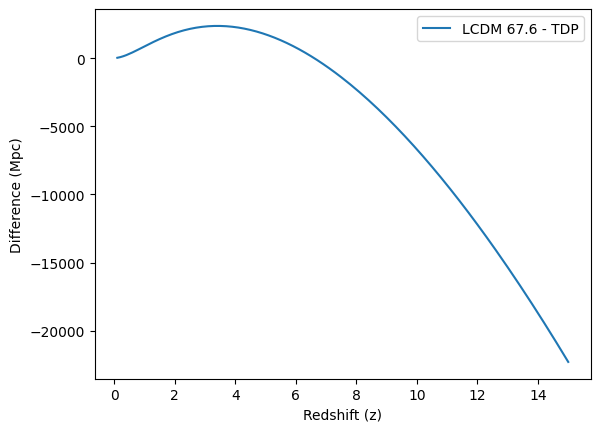

In [5]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad = []
for i in range(len(data)):
    datad.append(data2[i][1] - data[i][1])
        
plt.plot(dataz, datad, label = "LCDM 67.6 - TDP")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (Mpc)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

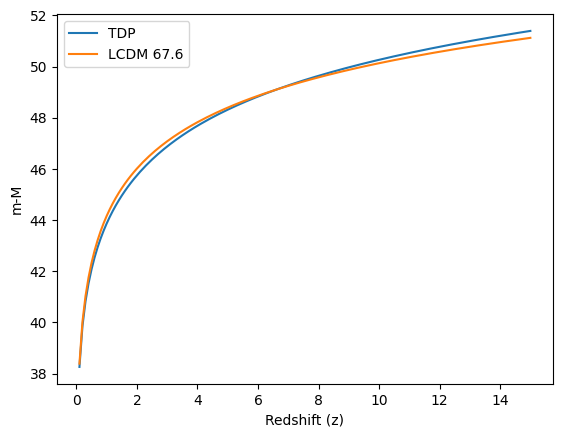

In [6]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[2] for row in data] 
datad2 = [row[2] for row in data2] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = "LCDM 67.6")

plt.xlabel("Redshift (z)")
plt.ylabel("m-M")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

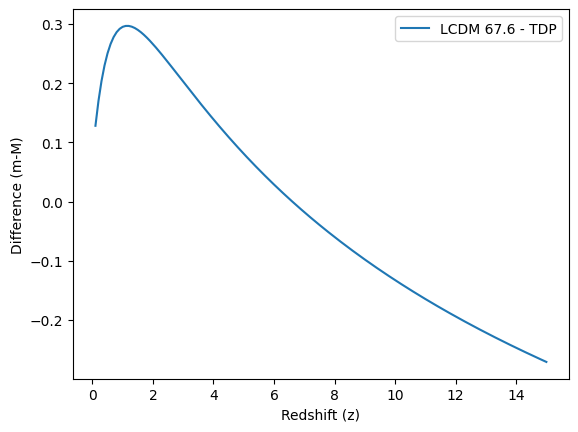

In [7]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] {"z": 0.0477, "OH": 7.590, "OHerr": 0.190},{"z": 0.0687, "OH": 7.470, "OHerr": 0.180},{"z": 0.0282, "OH": 7.390, "OHerr": 0.080},{"z": 0.0020, "OH": 7.679, "OHerr": 0.118},{"z": 0.0038, "OH": 7.150, "OHerr": 0.090},{"z": 0.0038, "OH": 7.320, "OHerr": 0.040},{"z": 0.0038, "OH": 7.300, "OHerr": 0.080},{"z": 0.0038, "OH": 7.320, "OHerr": 0.040},{"z": 0.0101, "OH": 7.650, "OHerr": 0.018},{"z": 0.0087, "OH": 7.600, "OHerr": 0.030},{"z": 0.0491, "OH": 7.480, "OHerr": 0.070},{"z": 0.0085, "OH": 7.680, "OHerr": 0.040},{"z": 0.0611, "OH": 7.560, "OHerr": 0.050},{"z": 0.0064, "OH": 7.558, "OHerr": 0.032},{"z": 0.0417, "OH": 7.080, "OHerr": 0.068},{"z": 0.0381, "OH": 7.540, "OHerr": 0.170},{"z": 0.0073, "OH": 7.524, "OHerr": 0.060},{"z": 0.0121, "OH": 7.220, "OHerr": 0.070},{"z": 0.0121, "OH": 7.010, "OHerr": 0.070},{"z": 0.0121, "OH": 6.980, "OHerr": 0.060},{"z": 0.0121, "OH": 6.860, "OHerr": 0.140},{"z": 0.0121, "OH": 7.230, "OHerr": 0.010},{"z": 0.0121, "OH": 7.150, "OHerr": 0.020},{"z": 0.0442, "OH": 7.430, "OHerr": 0.140},{"z": 0.0444, "OH": 6.979, "OHerr": 0.019},{"z": 0.0385, "OH": 7.490, "OHerr": 0.070},{"z": 0.0023, "OH": 7.450, "OHerr": 0.020},{"z": 0.0076, "OH": 7.690, "OHerr": 0.040},{"z": 0.0076, "OH": 7.430, "OHerr": 0.130},{"z": 0.0048, "OH": 7.240, "OHerr": 0.080},{"z": 0.0420, "OH": 7.620, "OHerr": 0.020},{"z": 0.0133, "OH": 7.354, "OHerr": 0.133},{"z": 0.0061, "OH": 7.660, "OHerr": 0.060},{"z": 0.0092, "OH": 7.500, "OHerr": 0.140},{"z": 0.0092, "OH": 7.460, "OHerr": 0.090},{"z": 0.0021, "OH": 7.680, "OHerr": 0.030},{"z": 0.0025, "OH": 7.511, "OHerr": 0.136},{"z": 0.0024, "OH": 7.080, "OHerr": 0.190},{"z": 0.0423, "OH": 7.680, "OHerr": 0.050},{"z": 0.0025, "OH": 7.172, "OHerr": 0.012},{"z": 0.0026, "OH": 7.222, "OHerr": 0.015},{"z": 0.0162, "OH": 7.173, "OHerr": 0.066},{"z": 0.0018, "OH": 7.654, "OHerr": 0.049},{"z": 0.0027, "OH": 7.020, "OHerr": 0.030},{"z": 0.0048, "OH": 7.652, "OHerr": 0.020},{"z": 0.0020, "OH": 7.450, "OHerr": 0.170},{"z": 0.0019, "OH": 7.160, "OHerr": 0.090},{"z": 0.0020, "OH": 7.080, "OHerr": 0.090},{"z": 0.0020, "OH": 7.180, "OHerr": 0.050},{"z": 0.0020, "OH": 7.230, "OHerr": 0.070},{"z": 0.0039, "OH": 7.640, "OHerr": 0.010},{"z": 0.0074, "OH": 7.590, "OHerr": 0.060},{"z": 0.0078, "OH": 7.620, "OHerr": 0.010},{"z": 0.0004, "OH": 7.170, "OHerr": 0.050},{"z": 0.0373, "OH": 7.510, "OHerr": 0.070},{"z": 0.0442, "OH": 7.590, "OHerr": 0.030},{"z": 0.0032, "OH": 7.130, "OHerr": 0.080},{"z": 0.0131, "OH": 7.450, "OHerr": 0.042},{"z": 0.0130, "OH": 7.440, "OHerr": 0.010},{"z": 0.0321, "OH": 7.620, "OHerr": 0.160},{"z": 0.0022, "OH": 7.160, "OHerr": 0.070},{"z": 0.0020, "OH": 7.320, "OHerr": 0.160},{"z": 0.0021, "OH": 7.310, "OHerr": 0.110},{"z": 0.0045, "OH": 7.640, "OHerr": 0.040},{"z": 0.0037, "OH": 7.470, "OHerr": 0.100},{"z": 0.0259, "OH": 7.650, "OHerr": 0.190},{"z": 0.0047, "OH": 7.510, "OHerr": 0.020},{"z": 0.0051, "OH": 7.500, "OHerr": 0.030},{"z": 0.0052, "OH": 7.680, "OHerr": 0.050},{"z": 0.0033, "OH": 7.550, "OHerr": 0.030},{"z": 0.0654, "OH": 7.440, "OHerr": 0.040},{"z": 0.0005, "OH": 7.530, "OHerr": 0.020},{"z": 0.0260, "OH": 7.496, "OHerr": 0.012},{"z": 0.0090, "OH": 7.544, "OHerr": 0.011},{"z": 0.0090, "OH": 7.594, "OHerr": 0.018},{"z": 0.0019, "OH": 7.620, "OHerr": 0.040},{"z": 0.1330, "OH": 7.035, "OHerr": 0.026},{"z": 0.0209, "OH": 7.620, "OHerr": 0.080},{"z": 0.0505, "OH": 7.551, "OHerr": 0.075},{"z": 0.0623, "OH": 7.430, "OHerr": 0.060},{"z": 0.0030, "OH": 7.470, "OHerr": 0.110},{"z": 0.0031, "OH": 7.480, "OHerr": 0.090},{"z": 0.0281, "OH": 7.560, "OHerr": 0.040},{"z": 0.0116, "OH": 7.637, "OHerr": 0.059},{"z": 0.0024, "OH": 7.400, "OHerr": 0.050},{"z": 0.0089, "OH": 7.636, "OHerr": 0.040},{"z": 0.0328, "OH": 7.560, "OHerr": 0.040},{"z": 0.0224, "OH": 7.560, "OHerr": 0.200},{"z": 0.0057, "OH": 7.209, "OHerr": 0.125},{"z": 0.0312, "OH": 6.900, "OHerr": 0.030},{"z": 0.0250, "OH": 7.480, "OHerr": 0.110},{"z": 0.0360, "OH": 7.560, "OHerr": 0.090},{"z": 0.0043, "OH": 7.260, "OHerr": 0.030},{"z": 0.0230, "OH": 7.680, "OHerr": 0.010},{"z": 0.0172, "OH": 7.415, "OHerr": 0.024},{"z": 0.0170, "OH": 7.406, "OHerr": 0.017},{"z": 0.0762, "OH": 7.085, "OHerr": 0.031},{"z": 0.0058, "OH": 7.670, "OHerr": 0.020},{"z": 0.0287, "OH": 7.050, "OHerr": 0.170},{"z": 0.0206, "OH": 7.491, "OHerr": 0.012},{"z": 0.0206, "OH": 7.584, "OHerr": 0.012},{"z": 0.0331, "OH": 7.550, "OHerr": 0.070},{"z": 0.0123, "OH": 7.150, "OHerr": 0.200}
datad = []
for i in range(len(data)):
    datad.append(data2[i][2] - data[i][2])
        
plt.plot(dataz, datad, label = "LCDM 67.6 - TDP")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (m-M)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

In [20]:
(data[124][1] ) *pc2ly


490799.4459152626

In [17]:
data2[124][0]

12.499999999999972